# Team Project 5 - Singular Value Decomposition and Image Processing

The Singular Value Decomposition (SVD) has many applications in pure mathematics, applied mathematics, and data science. A common theme of many applications of SVD is that for a matrix $A$, by using SVD, we can find a new matrix $A_k$ which is a good approximation of $A$, but the rank of $A_k$ is at most $k$. In general, a small rank matrix can be described with a lower number of entries; we can regard $A_k$ as a "compression" of $A$. 

The goal of this project is twofold. First of all, we investigate how to compress image data using the already implemented SVD calculation method. Secondly, we will make a code for one step of SVD calculation. 

#### 1. (25 pts) Two key steps on the diagonalization of a symmetric matrix (and hence on SVD) are Householder reduction and the QR method. Construct a method QRalgorithm(A, err) where $A$ is a symmetric tridiagonal matrix, err is a positive real number, and output is a list of eigenvalues of $A$. Let $A^{(k)}$ be the output of $k$-th iteration (See the notation in the lecture note) and let $e^{(k)}$ be the vector consisting of diagonal entries of $A^{(k)}$. Stop the iteration if either 
<ul>
    <li>$k = 1000$ or;</li>
    <li>$||e^{(k)} - e^{(k-1)}||_{\infty} < \mathrm{err}$.</li>
</ul>

#### Let $M$ be a $(10 \times 10)$ symmetric tridiagonal matrix such that $$M_{ij} = \begin{cases}11-i, & \mbox{if } i = j,\\1, & \mbox{if } i = j+1 \mbox{ or } i = j-1,\\0, & \mbox{otherwise}.\end{cases}$$
#### By using QRalgorithm(A, err), compute eigenvalues of $M$. Set $\mathrm{err} = 10^{-5}$. 

In [55]:
import numpy as np

np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

M = np.identity(10)
for i in range(len(M)):
    M[i][i] = 10-i
    if i > 0:
        M[i-1][i] = 1
    if i < 9:
        M[i+1][i] = 1
print(M)

def setzero(N):
    size = len(N)
    for i in range(size):
            for j in range(size):
                if abs(N[i][j])<=0.000000001:
                    N[i][j] = 0

def QRalgorithm(A, err):
    size = len(A)
    currErr = 1000
    iterations = 0
    
    while currErr > err and iterations < 999:
        iterations += 1
        
        #Q & R Calculation
        Ak = A
        ePrev = np.diag(Ak)
        Pprev = np.identity(size)
        for i in range(size - 1):
            P = np.identity(size)
            P[i][i] = Ak[i][i]/(np.sqrt(Ak[i][i]**2+Ak[i+1][i]**2))
            P[i+1][i+1] = P[i][i]
            P[i+1][i] = -Ak[i+1][i]/(np.sqrt(Ak[i][i]**2+Ak[i+1][i]**2))
            P[i][i+1] = -P[i+1][i]
            Q = np.matmul(P, Pprev)
            Pprev = Q
            Ak = np.matmul(P, Ak)
        Q = np.transpose(Q)
        R = Ak
        
        #A Calculation
        A = np.matmul(R, Q)
        
        #Error Calculation
        e = np.diag(A)
        currErr = np.linalg.norm(ePrev-e, np.inf)
    
    setzero(A)
    print("A"+str(iterations+1))
    print(A)
    return list(e)
        
QRalgorithm(M, 0.00001)

[[10.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  9.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  8.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  7.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  6.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  5.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  4.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  3.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  1.]]
A39
[[10.746  0.003  0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.003  9.211  0.006  0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.006  8.039  0.006  0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.006  7.004  0.003  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.003  6.     0.001  0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.001  5.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     3.996  0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     2.

[10.746188123339985,
 9.210648885259046,
 8.038946941167076,
 7.00397387348104,
 6.000224488229842,
 4.999783392626249,
 3.996048241783649,
 2.96105888432129,
 1.7893213526950833,
 0.25380581709667843]

From now on, we will discuss image processing with Python. For simplicity, we are going to use a grayscale (black and white) image only. Below is how to convert a grayscale image to a python matrix. Matplotlib can only read the .png file natively. 

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la

sloth_img = plt.imread('sloth_gray.png') 
sloth_img_array = sloth_img[:,:,0] 
# These two lines read 'sloth_gray.png' and record it as an array.

A matrix can be converted to a grayscale image, like the following.

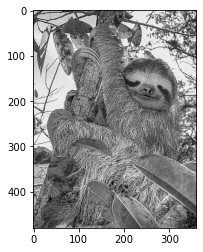

In [23]:
new_img = np.ndarray((480,360,3),dtype=float)
for i in range(3):
    new_img[:,:,i] = sloth_img_array
# This part makes a multi-dimensional array, which can be understood as an image.
    
plt.imshow(new_img)
plt.show()

In the above code, <b>sloth_img_array</b> is a matrix. Thus we can compute its SVD and use it to do some image processing. 

For a matrix $A$, <b>svd</b> method in the linear algebra module can be used to calculate its SVD. The output is a triplet of data $U$, $D$, and $V^t$, where $U$ and $V^t$ are orthogonal matrices and $D$ is a list of singular values of $A$ (not a diagonal matrix!). So if we denote $S$ as the diagonal matrix whose diagonal entries are numbers on $D$, then $A = USV^t$. 

In [4]:
A = np.array([[1,0,1],[0,1,0],[0,1,1],[0,1,0],[1,1,0]])
U, D, Vt = la.svd(A, full_matrices = True)
print("U=", U)
print("D=", D)
print("V^t=", Vt)

U= [[-3.65148372e-01  8.16496581e-01  2.22044605e-16  1.18391207e-01
  -4.31258069e-01]
 [-3.65148372e-01 -4.08248290e-01 -2.77555756e-17 -5.63487672e-01
  -6.18451004e-01]
 [-5.47722558e-01 -1.11022302e-16  7.07106781e-01 -1.18391207e-01
   4.31258069e-01]
 [-3.65148372e-01 -4.08248290e-01 -4.16333634e-17  8.00270086e-01
  -2.44065135e-01]
 [-5.47722558e-01  1.66533454e-16 -7.07106781e-01 -1.18391207e-01
   4.31258069e-01]]
D= [2.23606798 1.41421356 1.        ]
V^t= [[-4.08248290e-01 -8.16496581e-01 -4.08248290e-01]
 [ 5.77350269e-01 -5.77350269e-01  5.77350269e-01]
 [-7.07106781e-01 -1.11022302e-16  7.07106781e-01]]


#### 2. (15 pts) Construct a method SVDcompression(A, k) which performs
<ul>
    <li>Compute a SVD of $A$;</li>
    <li>Calculate $A_k = U_k \cdot S_k \cdot V_k^t$, where $U_k$ is the first $k$ columns of $U$, $S_k$ is the first $k$ rows and $k$ columns of $S$, and $V_k^t$ is the first $k$ rows of $V^t$;</li>
    <li>Convert $A_k$ as a grayscale image and show it.</li>
</ul>

In [19]:
def SVDcompression(A, k):
    U,D,Vt = la.svd(A,full_matrices=True)
    if k>len(D):
        print('k is too large')
        return
    Uk = U[:,:k]
    Sk = np.diag(D[:k])
    Vtk = Vt[:k,]
    US = np.dot(Uk,Sk)
    return np.dot(US,Vtk)

#### 3. (10 pts) Prepare your favorite image file in a grayscale .png format. (A photo is better than computer graphics. I suggest using a picture smaller than $500 \times 500$.) Load the image file and plot the original image. Convert the image as a matrix $A$. Run SVDcompression(A,k) for $k = 1, 5, 10$, and $50$.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


k = 1


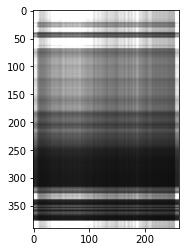

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


k = 5


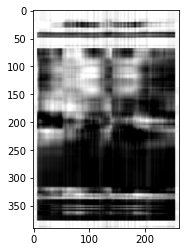

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


k = 10


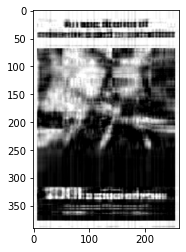

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


k = 50


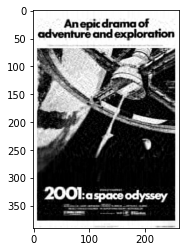

In [46]:
space_img = plt.imread('2001.png') 
space_img_array = space_img[:,:,0] 

klist = [1, 5, 10, 50]
for i in klist:
    M = SVDcompression(space_img_array,i)
    new_img = np.ndarray((390,261,3),dtype=float)
    for j in range(3):
        new_img[:,:,j] = M
    plt.imshow(new_img)
    print("k =", i)
    plt.show()

1. (25 pts)

2. (15 pts)

3. (10 pts)

(25 + 15 + 10 = 50) Good job!